# **PHYS 481 - Computational Physics II**

## **Assignment #7 - Diffusion**

### **NAME:** Scott Salmon

### **UCID:** 30093320

### **FILE:** a7_scottsalmon

### **DATES:** 2024/11/25 - 2024/11/28

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from  matplotlib.animation import FuncAnimation

### Question 1: [5 pts]

A 10 cm long box is filled with CO2 at room temperature and atmospheric pressure. The middle portion of the box from 4 to 6 cm is sealed off from the rest of the box, and a trace amount of $N_2$ is injected into
the middle section until the $N_2$ density reaches $10^{10}$ $N_2$ molecules per cubic cm. The resulting mean free path of the $N_2$ molecules is 67 nm and their average speed is 480 m/s. Using a random walk with
Gaussian steps, simulate what happens when the barriers at 4 and 6 cm are removed. You may either assume that particles that hit the walls at 0 and 10 cm are reflected off the walls (so that a particle that
steps to -0.01 cm is re-introduced to the box at 0.01 cm) or you may use periodic boundaries (so that a particle that steps to -0.01 cm returns at 9.99 cm).

Create a movie of the density of $N_2$ molecules as a function of position (i.e. a histogram, in units of $cm^{-3}$) as they diffuse throughout the box over a period of 30 seconds.

[HINT: Start developing your code with a small number of particles 𝑁 (perhaps a few hundred) and then increase it when you think your code works. A good target for 𝑁 would be about about 100,000. A good
target for the number of timesteps is about 50 steps; use that information and the information in the question to determine the expected width of the Gaussian random walk step.]

Saved animation as 'q1_2d.gif'
Saved animation as 'q1_3d.gif'


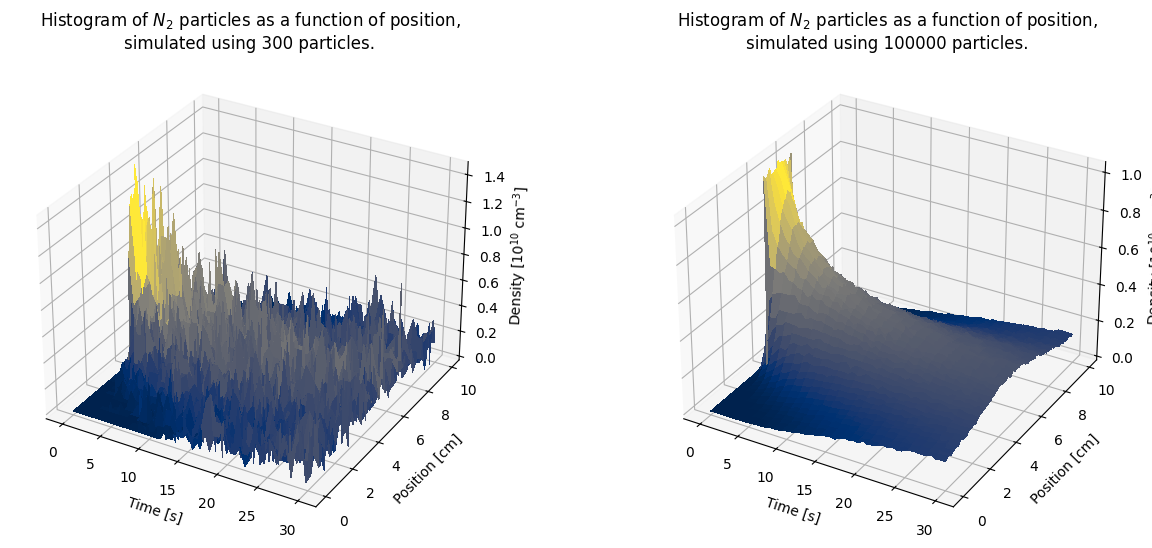

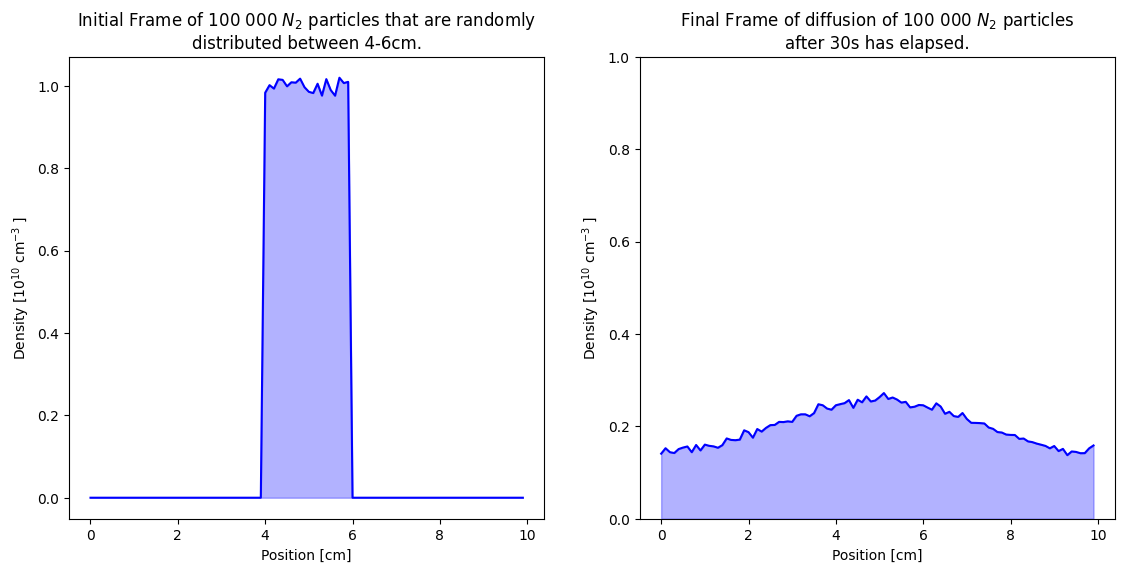

In [ ]:
def subplots_q1_3d():

    '''This function creates the first two subplots in 3D, comparing the final result of the simulation using 300 particles vs. 100 000 particles. 
    The majority of the algorithm is very similar to the other functions.'''

    #setting N values to 300 and 100 000 for two different simulations
    N_values = [300, 100000]

    #initializing subplot figure
    fig, axs = plt.subplots(1, 2, figsize=(15, 6), subplot_kw={"projection": "3d"})

    for i, N in enumerate(N_values):

        #Initial particles are between 4-6 cm
        particles = np.random.uniform(0.04, 0.06, N)

        #Create a 2D history array to store particle densities over time
        history = np.zeros((100, steps + 1))

        #Scaling factor so density is in 10^10 particles/cm^3
        scaling = 20 / N

        #Initial histogram
        counts, bins = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))
        history[:, 0] = counts * scaling

        #Update particle positions and create histograms at each time step
        for step in range(1, steps + 1):
            step_move = np.random.normal(size=N) * sigma  #Generate random movement steps
            particles = (particles + step_move) % 0.1  #Periodic boundary conditions

            counts, _ = np.histogram(particles * 100, bins=bins)  #Create histogram
            history[:, step] = counts * scaling  #Store in history

        # Create the meshgrid for time and position
        xx, yy = np.meshgrid(np.arange(0, history.shape[1] * dt, dt), bins[:-1])

        ax = axs[i]
        ax.plot_surface(xx, yy, history, cmap='cividis', antialiased=False)
        ax.set_title(f"Histogram of $N_2$ particles as a function of position,\nsimulated using {N} particles.")
        ax.set_xlabel('Time [s]')
        ax.set_ylabel('Position [cm]')
        ax.set_zlabel('Density [$10^{10}$ cm$^{-3}$]')

    fig.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.1, wspace=0.0)
    plt.show()

def subplots_q1_2d(N):

    '''This function creates the subplot that shows the intial and final frame of the diffusion (in 2D). The N parameter is the desired amount of particles to be simulated.
    The majority of the algorithm is very similar to the other functions.'''

    #Scaling factor so density is in 10^10 particles/cm^3
    scaling = 20 / N
    
    #Initialize particles (position between 4-6 cm, in meters)
    particles = np.random.uniform(0.04, 0.06, N)

    #Create the initial histogram
    counts, bins = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))
    density = counts * scaling

    #Set up the figure for the animation
    fig, axs = plt.subplots(1, 2, figsize=(13.5, 6))
    ax = axs[0]
    ax2 = axs[1]
    ax.set_title("Initial Frame of 100 000 $N_2$ particles that are randomly\ndistributed between 4-6cm.")
    ax.set_xlabel('Position [cm]')
    ax.set_ylabel('Density [$10^{10}$ cm$^{-3}$ ]')

    # Initialize a line plot for the density
    x_vals = bins[:-1]  # Use the bin edges as x-values
    line, = ax.plot(x_vals, density, label="Density", color='b')
    
    #Fill the area under the curve
    fill = ax.fill_between(x_vals, 0, density, color='blue', alpha=0.3)

    for step in range(1, steps + 1):
        step_move = np.random.normal(size=N) * sigma  #Generate random movement steps
        particles = (particles + step_move) % 0.1  #Periodic boundary conditions

    counts, _ = np.histogram(particles * 100, bins=bins)  #Create histogram
    counts, bins = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))
    density = counts * scaling

    #Initialize a line plot for the density
    x_vals = bins[:-1]  # Use the bin edges as x-values
    line, = ax2.plot(x_vals, density, label="Density", color='b')

    #Fill the area under the curve
    fill = ax2.fill_between(x_vals, 0, density, color='blue', alpha=0.3)
    
    ax2.set_title("Final Frame of diffusion of 100 000 $N_2$ particles \nafter 30s has elapsed.")
    ax2.set_xlabel('Position [cm]')
    ax2.set_ylabel('Density [$10^{10}$ cm$^{-3}$ ]')
    ax2.set_ylim(0,1)

    plt.show()
         
def q1_2d_animation(N):
    
    '''This function creates the 2d animation file saved as "q1_2d.gif". The The N parameter is the desired amount of particles to be simulated.
    The majority of the algorithm is very similar to the other functions.'''

    # Initialize particles (position between 4-6 cm, in meters)
    particles = np.random.uniform(0.04, 0.06, N)

    # Create a 2D history array to store particle densities over time
    history = np.zeros((100, steps + 1))

    # Scaling factor so density is in 10^10 particles/cm^3
    scaling = 20 / N

    # Create the initial histogram
    counts, bins = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))
    history[:, 0] = counts * scaling

    # Set up the figure for the animation
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(f"2D Animation of the density of $N_2$ particles as a function of position over a\nperiod of 30 seconds, simulated using {N} particles using random walks.")
    ax.set_xlabel('Position [cm]')
    ax.set_ylabel('Density [$10^{10}$ cm$^{-3}$ ]')

    # Initialize a line plot for the density
    x_vals = bins[:-1]  # Use the bin edges as x-values
    line, = ax.plot(x_vals, history[:, 0], label="Density", color='b')
    
    # Initialize the fill area under the curve (it will be updated later)
    fill = ax.fill_between(x_vals, 0, history[:, 0], color='blue', alpha=0.3)

    # Function to update the plot for each frame in the animation
    def update(frame):
        nonlocal particles, fill

        if frame > 0:
            # Perform particle movement after frame 0
            step = np.random.normal(size=N) * sigma  # Random steps
            particles = particles + step  # Update particle positions
            particles = particles % 0.1  # Periodic boundary conditions
        
        # Update histogram counts
        counts, _ = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))
        history[:, frame] = counts * scaling

        # Update the line plot with the new density data
        line.set_ydata(history[:, frame])  # Update the Y data of the line plot

        # Clear the previous filled area under the curve
        fill.remove()

        # Create a new filled area under the curve for the current frame
        fill = ax.fill_between(x_vals, 0, history[:, frame], color='blue', alpha=0.3)

        return line, fill

    # Create the animation
    ani = FuncAnimation(fig, update, frames=steps, interval=100, blit=False)

    # Save the animation as a GIF
    ani.save('q1_2d.gif', writer='pillow', fps=15)
    print("Saved animation as 'q1_2d.gif'")
    plt.close(fig)

    return x_vals, history[:,-2]

def q1_3d_animation(N):
    
    '''This function creates the 3d animation file saved as "q1_3d.gif". The The N parameter is the desired amount of particles to be simulated.
    The majority of the algorithm is very similar to the other functions.'''

    # Create 1D particle positions, initial positions between 4-6 cm
    particles = np.random.uniform(0.04, 0.06, N)

    #Create a 2D history array to store particle densities over time
    history = np.zeros((100, steps + 1))  # 99 bins for position, steps+1 for time

    #Scaling factor so density is in 10^10 particles/cm^3
    scaling = 20 / N

    #Create the initial histogram for particle distribution
    counts, bins = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))  #Convert to cm
    history[:, 0] = counts * scaling  #Store initial particle densities

    #Set up the figure for the animation
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d', box_aspect=(0.9, 0.9, 0.9))

    # Time and position meshgrid for plotting
    xx, yy = np.meshgrid(np.arange(0, steps * dt + 0.99 * dt, dt), bins[:-1])
    ax.set_title(f"3D Animation of the density of $N_2$ particles as a function of position over a,\nperiod of 30 seconds, simulated using {N} particles using random walks.")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Position [cm]')
    ax.set_zlabel('Density [$10^{10}$ cm$^{-3}$]')

    # Create initial surface plot
    surface = ax.plot_surface(xx, yy, history, cmap='cividis', edgecolor='none', antialiased=False)

    # Function to update the plot for each frame in the animation
    def update(frame):
        nonlocal particles, surface

        if frame > 0:
            # Perform random walk for particles after frame 0
            step = np.random.normal(size=N) * sigma  # Random steps with standard deviation sigma
            particles += step  # Update particle positions
            particles = particles % 0.1  # Apply periodic boundary conditions (wrap around)

        # Update histogram counts based on particle positions
        counts, _ = np.histogram(particles * 100, bins=np.arange(0, 10.1, 0.1))
        history[:, frame] = counts * scaling

        # Update the surface plot with the new density data
        surface.remove()  # Remove the old surface
        surface = ax.plot_surface(xx, yy, history, cmap='cividis', edgecolor='none', antialiased=False)

        return surface

    #Create the animation with a GIF output at 15 fps
    ani = FuncAnimation(fig, update, frames=steps, interval=100, blit=False)
    ani.save('q1_3d.gif', writer='pillow', fps=15)
    print("Saved animation as 'q1_3d.gif'")
    plt.close(fig)

#initial variables
mean = 67e-9
speed = 480
steps = 50
time = 30

#Calculated variables
dt = time / steps
tau = mean / speed
sigma = mean * np.sqrt(dt / tau)

#x1 and y1 are saved for question 3.
x1, y1 = q1_2d_animation(100000)
q1_3d_animation(100000)
subplots_q1_3d()
subplots_q1_2d(100000)


### Question 2: [5 pts]

Repeat question 1 using an explicit Euler numerical solution of the Fokker-Planck equation. Use about 100 spatial points and a small enough timestep that the method is stable. Use either periodic boundary
conditions or Neumann conditions with d/dx=0.

Saved animation as 'q2_2d.gif'.
Saved animation as 'q3_3d.mp4'.


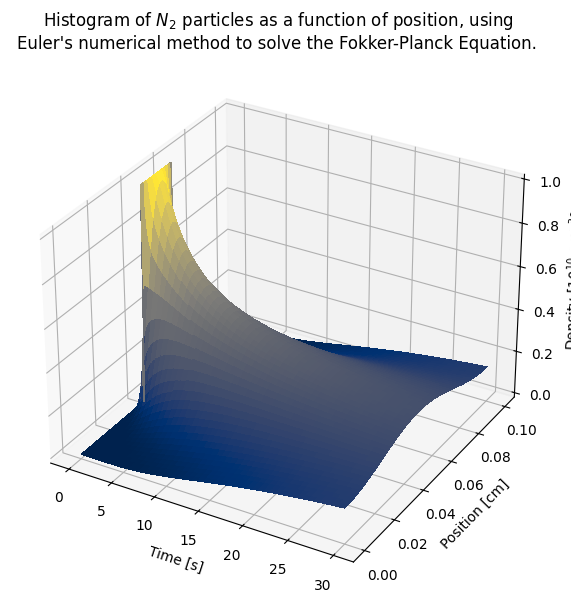

In [8]:
def Neumann_matrix(points):

    '''Takes in an N value, and returns a Neumann Matrix that is NxN, with boundary conditions d/dx = 0.'''

    # Set up matrix (Neumann boundary conditions: d/dx = 0)
    A = np.diag(-2 * np.ones(points)) + np.diag(np.ones(points - 1), 1) + np.diag(np.ones(points - 1), -1)
    A[0, 0], A[0, 1] = -1, 1  # Neumann condition at the left boundary
    A[-1, -1], A[-1, -2] = -1, 1  # Neumann condition at the right boundary

    return A

def update_density(current, A, coefficient):

    '''Takes in a current density value, a Neumann matrix denoted as "A", and the calculated coefficient for the Fokker-Planck equation. Returns new density values.'''

    new = np.zeros_like(current)

    # Vectorized update based on the diffusion equation
    intermediate = np.dot(A, current)  #Apply diffusion matrix
    new = current + coefficient * intermediate  #Update particle positions
    return new

def plot_q2():

    '''This function is what creates the histogram shown in the Jupyter Notebook. The majority of the algorithm is very similar to the other functions.'''

    #Initialize particles (position between 4-6 cm, in meters)
    x = np.linspace(0, 0.1, spatial)  #spatial grid
    particles = np.zeros_like(x)  #initialize particle density as 0
    particles[40:60] = 1  #introduce particles between 4-6 cm

    #Initialize history array to store particle density at each time step
    history = np.zeros((spatial, steps + 1))  # history of particle densities
    history[:, 0] = particles  # initial density

    #Simulate particle diffusion over time
    for t in range(steps):
        intermediate = np.dot(A, particles)  # apply the diffusion operator
        particles = particles + coefficient * intermediate  # update particle positions
        history[:, t + 1] = particles  # store updated density

    #Generate surface plot
    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(111, projection='3d')
    
    #Create meshgrid for time and spatial positions
    xx, yy = np.meshgrid(np.arange(0, steps * dt + 0.99 * dt, dt), x)

    #Plot the surface
    ax.plot_surface(xx, yy, history, cmap='cividis', antialiased=False)

    #Set labels for the plot
    ax.set_title(f"Histogram of $N_2$ particles as a function of position, using \nEuler's numerical method to solve the Fokker-Planck Equation. ")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Position [cm]')
    ax.set_zlabel('Density [$10^{10}$ cm$^{-3}$]')

    #Display the plot
    plt.show()

def q2_2d_animation():

    '''This function is what creates the 2d animated GIF with filename "q2_2d.gif". The majority of the algorithm is very similar to the other functions.'''

    #Initialize particles (position between 4-6 cm, in meters)
    x = np.linspace(0, 0.1, spatial)  # Spatial grid
    particles = np.zeros_like(x)  # Initialize particle density as 0
    particles[40:60] = 1  # Introduce particles between 4-6 cm

    #Set up the figure for the animation
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.set_title(f"2D Animation of the density of $N_2$ particles as a function of position over a\nperiod of 30 seconds. Using Euler's numerical method to solve the\nFokker-Planck Equation.")
    ax.set_xlabel('Position [cm]')
    ax.set_ylabel('Density [$10^{10}$ cm$^{-3}$]')

    #Create the initial line plot for density
    line, = ax.plot(x * 100, particles, label="Density", color='b')
    fill = ax.fill_between(x * 100, particles, color='b', alpha=0.3)

    #Function to update the plot for each frame in the animation
    def update(frame):
        nonlocal fill
        for _ in range(10):
            particles[:] = update_density(particles, A, coefficient)  # Update density in-place
        
        line.set_ydata(particles)

        # Update the line data
        fill.remove()  # Remove previous fill
        fill = ax.fill_between(x * 100, particles, color='b', alpha=0.3)  # Refill under the curve

        return line, fill  # Return both line and fill for FuncAnimation

    # Create the animation
    ani = FuncAnimation(fig, update, frames=steps // 10, interval=100, blit=True)

    # Save the animation
    ani.save('q2_2d.gif', writer='pillow', fps=100)
    print("Saved animation as 'q2_2d.gif'.")
    plt.close(fig)
    
    return x, particles

def q2_3d_animation():

    '''This function is what creates the 3d animated video with filename "q2_3d.mp4". The majority of the algorithm is very similar to the other functions.

    This function takes about 2.5 minutes to run on my desktop because it is so computationally expensive, so I usually have it commented out. Also requires 
    ffmpeg to write the file as a mp4. I probably could've optimized it, but I spent way too much time on it and it's not really necessary for the assignment anyways.'''

    # Initialize particles (position between 4-6 cm, in meters)
    x = np.linspace(0, 0.1, spatial)  # Spatial grid
    particles = np.zeros_like(x)  # Initialize particle density as 0
    particles[40:60] = 1  # Introduce particles between 4-6 cm

    # Create history array to store past densities for surface plot
    history = np.zeros((spatial, steps + 1))  # Store particle densities
    history[:, 0] = particles  # Store initial density

    # Set up the figure for the animation
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("3D Animation of the density of $N_2$ particles as a function of position over a\nperiod of 30 seconds. Using Euler's numerical method to solve the\nFokker-Planck Equation.")
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Position [cm]')
    ax.set_zlabel('Density [$10^{10}$ cm$^{-3}$]')

    # Create initial meshgrid with axes flipped
    time_values = np.linspace(0, steps * dt, steps + 1)
    xx, yy = np.meshgrid(time_values, x * 100)  # Flip position and time here

    # Initial surface plot
    surface = ax.plot_surface(xx, yy, history, cmap='cividis', edgecolor='none', antialiased=False)

    # Function to update the surface for each frame in the animation
    def update(frame):
        nonlocal particles, surface

        particles[:] = update_density(particles, A, coefficient)  # Update density in-place

        # Update history with new particles
        history[:, frame + 1] = particles

        # Remove the previous surface
        surface.remove()

        # Update the surface with new data (now reflecting flipped axes)
        surface = ax.plot_surface(xx, yy, history, cmap='cividis', edgecolor='none', antialiased=False)

        return surface,

    # Adjust frame count for a longer animation
    ani = FuncAnimation(fig, update, frames=steps, interval=10, blit=False)

    #Save the animation, saved as mp4 due to the amount of frames.
    ani.save(f'q2_3d.mp4', writer='ffmpeg', fps=120)
    print(f"Saved animation as 'q3_3d.mp4'.")
    plt.close(fig)

#Initial variables
spatial = 100  # Number of spatial points

# Calculated variables
D = mean * speed / 2
dx = 0.1 / spatial
dt = dx**2 / (2*D) * 0.95 #CFL condition, multiplied by 0.95 for safety reasons so that simulation stays stable. This is near max dt value.
steps = int(time / dt)  # Total number of time steps
coefficient = D * dt / (dx ** 2)
A = Neumann_matrix(spatial)

#x2 and y2 are saved for question 3.
x2, y2 = q2_2d_animation()
q2_3d_animation()
plot_q2()


### Question 3: [2 pts]

Compare the final $N_2$ density at t=30 seconds from questions 1 and 2 by combining the final histogram from question 1 and the final plot from question 2.

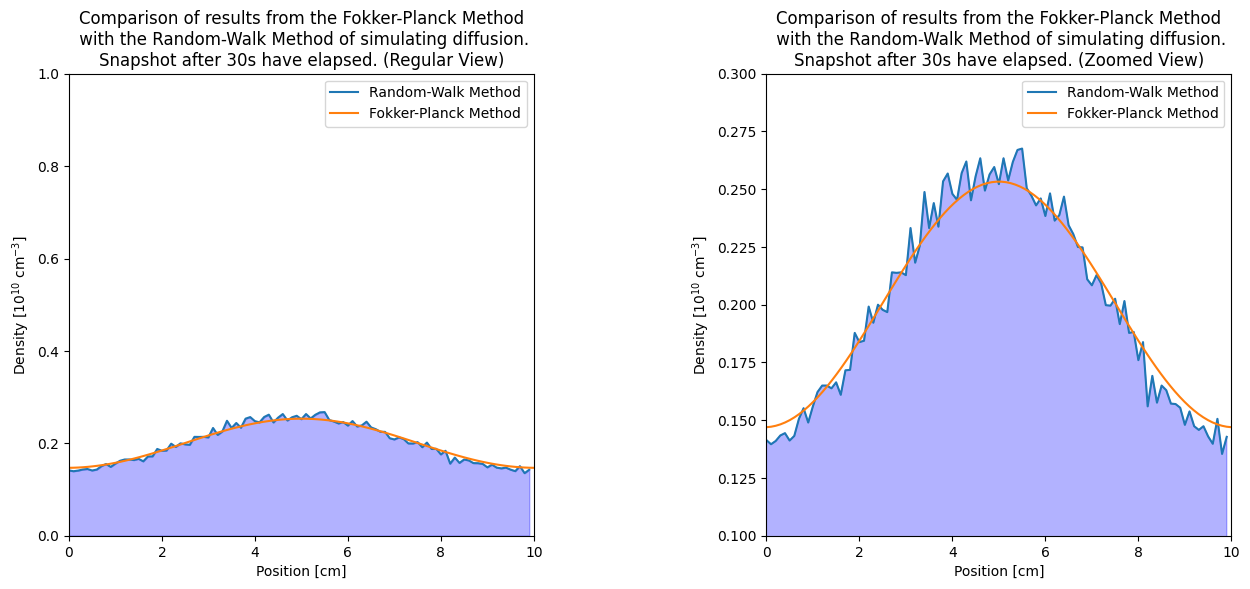

In [7]:
def q3(x1,x2,y1,y2):

    '''This function takes in the results from question 1 and question 2 and creates a subplot that compares the two. One zoomed out, one zoomed in.'''

    #have to scale x2 so same size as x1.
    scaled_x2 = x2 * 100

    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    fig.subplots_adjust(wspace = 0.5)
    ax1 = axs[0]
    ax2 = axs[1]

    ax1.set_title("Comparison of results from the Fokker-Planck Method\n with the Random-Walk Method of simulating diffusion.\nSnapshot after 30s have elapsed. (Regular View)")
    ax1.plot(x1,y1, label="Random-Walk Method")
    ax1.plot(scaled_x2,y2, label='Fokker-Planck Method')
    ax1.fill_between(x1, 0, y1, color='blue', alpha=0.3)
    ax1.set_xlabel('Position [cm]')
    ax1.set_ylabel('Density [$10^{10}$ cm$^{-3}$]')
    ax1.set_xlim(0,10)
    ax1.set_ylim(0,1)
    ax1.legend()

    ax2.set_title("Comparison of results from the Fokker-Planck Method\n with the Random-Walk Method of simulating diffusion.\nSnapshot after 30s have elapsed. (Zoomed View)")
    ax2.plot(x1,y1, label="Random-Walk Method")
    ax2.plot(scaled_x2,y2, label='Fokker-Planck Method')
    ax2.fill_between(x1, 0, y1, color='blue', alpha=0.3)
    ax2.set_xlabel('Position [cm]')
    ax2.set_ylabel('Density [$10^{10}$ cm$^{-3}$]')
    ax2.set_xlim(0,10)
    ax2.set_ylim(0.1,0.3)
    ax2.legend()
    plt.show()

q3(x1,x2,y1,y2)